pruebas con las transformada hough para la detección de lineas

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.io

import daslib


In [3]:
root_folder = "e:/DAS/2021-11-30_Medidas"

#list all .mat files in the folder
import glob
files = glob.glob(root_folder + "/*.mat")
print(files)

#load all files
import scipy.io
data = [scipy.io.loadmat(file) for file in files]

#concat al Fp
Fp = np.concatenate([d['Fp'] for d in data])

['e:/DAS/2021-11-30_Medidas\\medida_211130_11_55_19.mat', 'e:/DAS/2021-11-30_Medidas\\medida_211130_12_00_18.mat', 'e:/DAS/2021-11-30_Medidas\\medida_211130_12_05_19.mat', 'e:/DAS/2021-11-30_Medidas\\medida_211130_12_10_25.mat', 'e:/DAS/2021-11-30_Medidas\\medida_211130_12_15_43.mat', 'e:/DAS/2021-11-30_Medidas\\medida_211130_12_20_33.mat', 'e:/DAS/2021-11-30_Medidas\\medida_211130_12_25_22.mat', 'e:/DAS/2021-11-30_Medidas\\medida_211130_12_31_59.mat', 'e:/DAS/2021-11-30_Medidas\\medida_211130_12_36_52.mat']


In [4]:
Fp.shape

(144000, 1160)

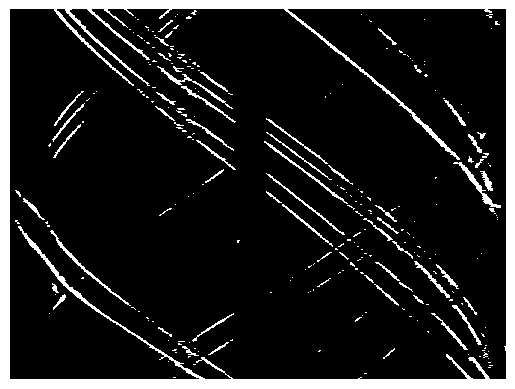

In [16]:
#pcolormesh of Fp with a threshold and black and withe
plt.pcolormesh(Fp[1:10000,:]>0.1, cmap='gray')
#save image a bw.png withouth axis and black background
plt.axis('off')
plt.savefig('bw.png')


22


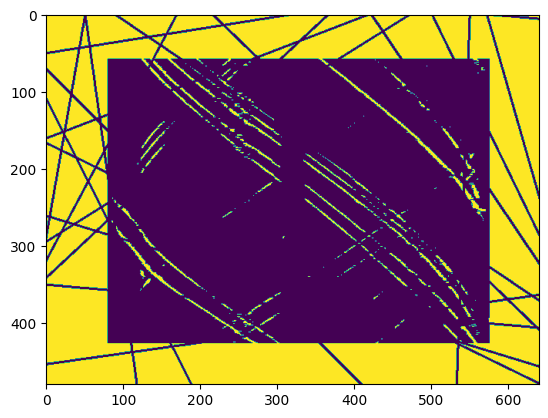

In [27]:
img = cv2.imread('bw.png',0)
#apply threshold
ret,thresh = cv2.threshold(img,127,255,0)
#hough transform of img
# This returns an array of r and theta values
lines = cv2.HoughLines(thresh, 100, np.pi/180, 255)
print(len(lines))
#draw lines
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
#show image
plt.imshow(img)
